# Decision Trees 

<a class="anchor" id="0.1"></a>
### **Table of Contents**

1.	[Definition](#1)
2.	[How does it work?](#2)
3.  [Where/How to split?](#3)
4.  [Optimization](#4)
5.  [Advantages/Disadvantages](#4)
6.  [Ensembling Techniques](#5)
7.  [Applications](#6)
8.  [References](#7)

## **1. Definition** <a class="anchor" id="1"></a>

- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret

<img src="DecisionTree.png" width=600 height=600 />


## **2. How does it work?** <a class="anchor" id="2"></a>

The basic idea behind any decision tree algorithm is as follows:

- Select the best attribute using Attribute Selection Measures(ASM) to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
- All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.

<img src="DT2.jpg" width=600 height=600 />


## **3. Where/How to SPlit?** <a class="anchor" id="3"></a>


- Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. 
- Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

- The algorithm selection is also based on type of target variables. 
- Common metrics to choose the splittine Nodes

    - Gini Index
    - Entropy metric
    - Chi-Square Test
 


<img src="Gini_ENtropy.jpg" width=600 height=600 />


## **4. Optimization** <a class="anchor" id="4"></a>

- Minimum samples for a node split
- Minimum samples for a terminal node (leaf)
- Maximum depth of tree (vertical depth)
- Maximum number of terminal nodes

- Pruning DT

## **5. Advantages/Disadvantages** <a class="anchor" id="5"></a>
### Advantages 
    - Simple to understand and to interpret. Trees can be visualised.
     - Useful in Data exploration: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable
    - Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed.
    - Able to handle both numerical and categorical data.
    - Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
    - Non Parametric Method: Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.
### DisAdvantages
    - Overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
    - Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
    - There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
    - Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## **6. Ensembling Techniques** <a class="anchor" id="6"></a>


## **7. Applications** <a class="anchor" id="7"></a>


In [41]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [22]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


pandas.core.series.Series

In [12]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [44]:
# Input and Target variables
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','age','label']
X = pima[1:] # Features
y = pima[1:].label # Target variable

In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

### Decision Tree CLassifier

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[Text(167.4, 163.07999999999998, 'X[8] <= 0.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 354\nvalue = [354, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 183\nvalue = [0, 183]')]

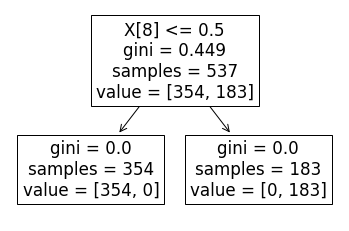

In [39]:
tree.plot_tree(clf) 

### Decision Tree CLassifier with Parameters

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


import graphviz
import os
os.environ\["PATH"\] += os.pathsep + 'C:/Users/tstusr/AppData/Local/Continuum/anaconda3/pkgs/Graphviz2.38/bin'


InvocationException: GraphViz's executables not found

## **8. References** <a class="anchor" id="8"></a>


- https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python